Initial classification accuracy: 50.00%
Starting Weights
W1:  [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]]
W2:  [[ 1.57921282]
 [ 0.76743473]
 [-0.46947439]]
b1:  [[0. 0. 0.]]
b2:  [[0.]]
T:  [0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1]
A2:  [0.75535527 0.75589187 0.75971876 0.75382981 0.75410235 0.75331955
 0.75371662 0.7530383  0.75435294 0.75553685 0.7613327  0.75730826
 0.76352533 0.75336802 0.75621461 0.75557131 0.75716002 0.75572947
 0.75431628 0.75489939 0.75567729 0.75402275 0.75934551 0.76110946
 0.75460304 0.75409475 0.7547134  0.75883849 0.75533446 0.7576426
 0.75441842 0.7534558  0.7574854  0.75475859 0.75536636 0.75556866
 0.75603375 0.75442175 0.75430205 0.75590752 0.75312793 0.7539569
 0.75852417 0.75868362 0.75328892 0.75415938 0.75445026 0.75699306
 0.75632163 0.75606182 0.756840

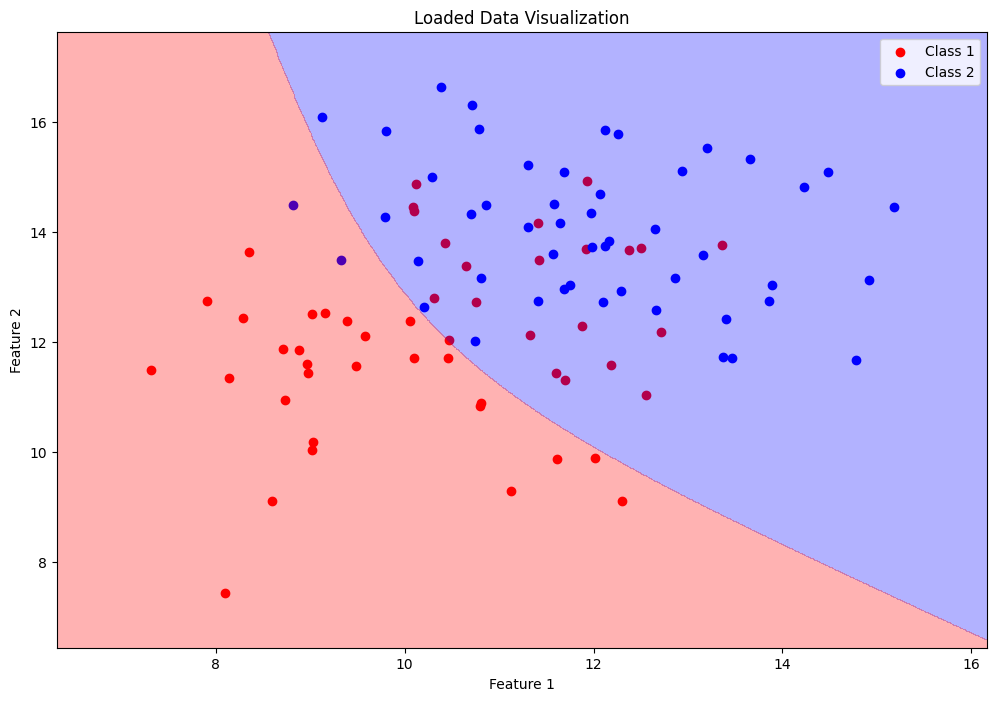

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# float_formatter = "{:.2f}".format
# np.set_printoptions(formatter={'float_kind':float_formatter})

# Load the datasets
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')

# Combine the datasets
X = np.concatenate((X1, X2))
# Create labels: 0 for Class 1, 1 for Class 2
T = np.array([0]*len(X1) + [1]*len(X2))

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
T = T[indices]

# Define the number of neurons in each layer
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

# Initialize weights randomly 
np.random.seed(42)  # For reproducibility
W1 = np.random.normal(0, 1, (input_neurons, hidden_neurons))  # Weights from input to hidden layer (shape: [2, 3])
W2 = np.random.normal(0, 1, (hidden_neurons, output_neurons))  # Weights from hidden to output layer (shape: [3, 1])
# Bias initialization
# b1 = np.random.normal(0, 1, (output_neurons, hidden_neurons))  # Biases for hidden layer
# b2 = np.random.normal(0, 1, (output_neurons, output_neurons))  # Bias for output layer
b1 = np.zeros((output_neurons, hidden_neurons))  # Biases for hidden layer
b2 = np.zeros((output_neurons, output_neurons))  # Bias for output layer


# Define activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(x):
    return x * (1 - x)


# Forward pass function
def forward_pass(X, W1, W2):
    # Hidden layer computations
    Z1 = np.dot(X, W1) + b1   # Linear combination with bias
    # A1 = relu(Z1)             # Activation
    A1 = sigmoid(Z1)
    
    # Output layer computations
    Z2 = np.dot(A1, W2) + b2  # Linear combination with bias
    A2 = sigmoid(Z2)          # Activation

    return Z1, A1, Z2, A2.flatten()       # Flatten to 1D array for convenience

# X = X[:1, :]

# Compute outputs for all data points
Z1_init, A1_init, Z2_init, outputs = forward_pass(X, W1, W2)

# Classification: threshold at 0.5
predictions = (outputs >= 0.5).astype(int)

# Compute classification accuracy
accuracy = np.mean(predictions == T) * 100
print(f"Initial classification accuracy: {accuracy:.2f}%")

# Backpropagation

# Learning rate
learning_rate = 0.1

print('Starting Weights')
print('W1: ', W1)
print('W2: ', W2)
print('b1: ', b1)
print('b2: ', b2)

# Forward pass to get intermediate values
Z1, A1, Z2, A2 = forward_pass(X, W1, W2)

print('T: ', T)
# print('A1 : ', A1.shape)
# print('A2: ', A2.shape)
# print('A1: ', A1)
print('A2: ', A2)
# print('Z2: ', Z2)
# print('sigmoid(Z2)', sigmoid(Z2))

for epoch in range (1, 1000):
    ################################################################
    # Delta at output layer
    delta_L = T - A2                      # Shape: [N]
    delta2 = A2 * (1 - A2) * delta_L      # Shape: [N]

    # print('delta_L: ', delta_L)
    # print('delta2: ', delta2)
    
    # Reshape delta2 to be [N, 1] for matrix operations
    delta2 = delta2.reshape(-1, 1)
    
    # Gradient w.r.t W2
    grad_W2 = np.dot(A1.T, delta2)        # Shape: [3, 1]

    # Delta at hidden layer
    # delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(Z1)  # Shape: [N, 3]
    delta_K = np.dot(delta2, W2.T)
    delta1 = A1 * (1 - A1) * delta_K

    # print('delta_K: ', delta_K)
    # print('delta1: ', delta1)
    
    # Gradient w.r.t W1
    grad_W1 = np.dot(X.T, delta1)         # Shape: [2, 3]
    
    # Update the weights
    W2 += learning_rate * grad_W2
    W1 += learning_rate * grad_W1

    ################################################################
    # Delta at output layer
    # delta_L = A2 - T.reshape(-1, 1)            # Shape: [N, 1]
    # delta2 = delta_L * A2 * (1 - A2)           # Shape: [N, 1]
    # delta_L = A2 - T                      # Shape: [N]
    # delta_L = T - A2                      # Shape: [N]
    # delta2 = delta_L * A2 * (1 - A2)      # Shape: [N]

    # print('delta_L: ', delta_L)
    # print('delta2: ', delta2)
    
    # # Gradient w.r.t W2 and b2
    # grad_W2 = np.dot(A1.T, delta2)             # Shape: [3, 1]
    # grad_b2 = np.sum(delta2, axis=0, keepdims=True)  # Shape: [1, 1]

    # # # Reshape delta2 to be [N, 1] for matrix operations
    # delta2 = delta2.reshape(-1, 1)
    
    # # Delta at hidden layer
    # delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(Z1)  # Shape: [N, 3]
    
    # # Gradient w.r.t W1 and b1
    # grad_W1 = np.dot(X.T, delta1)              # Shape: [2, 3]
    # grad_b1 = np.sum(delta1, axis=0, keepdims=True)     # Shape: [1, 3]

    # print('grad_W1: ', grad_W1)
    # print('grad_W2: ', grad_W2)
    
    # # Update the weights and biases
    # W2 -= learning_rate * grad_W2
    # b2 -= learning_rate * grad_b2
    # W1 -= learning_rate * grad_W1
    # b1 -= learning_rate * grad_b1
    # W2 -= grad_W2
    # b2 -= grad_b2
    # W1 -= grad_W1
    # b1 -= grad_b1
    
    # Forward pass with updated weights
    Z1, A1, Z2, A2 = forward_pass(X, W1, W2)

    

print('Ending Weights')
print('W1: ', W1)
print('W2: ', W2)
print('b1: ', b1)
print('b2: ', b2)
print('A2: ', A2)

outputs_updated = A2

# Updated predictions and accuracy
predictions_updated = (outputs_updated >= 0.5).astype(int)
print(predictions_updated)
updated_accuracy = np.mean(predictions_updated == T) * 100
print(f"Updated classification accuracy: {updated_accuracy:.2f}%")

# create a mesh to plot in
h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Compute the MLP output for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
_, _, _, grid_outputs = forward_pass(grid_points, W1, W2)
grid_predictions = grid_outputs.reshape(xx.shape)

# Plot the data
plt.figure(figsize=(12, 8))
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 2')
plt.contourf(xx, yy, grid_predictions >= 0.5, alpha=0.3, levels=[-1, 0, 1], colors=['blue', 'red'])
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Loaded Data Visualization')
plt.show()


X.shape:  (100, 2)
T.shape:  (100,)
centers:  [[10.2616 16.1790]
 [13.0710 12.9435]
 [8.5442 8.8752]]


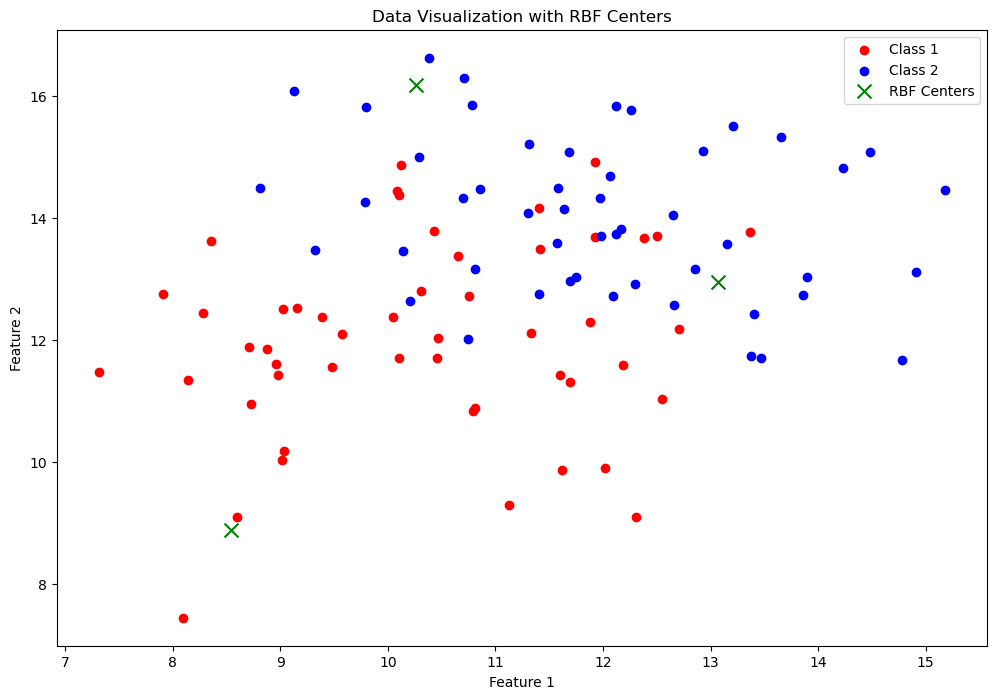

W:  [[1.5008]
 [1.2901]
 [0.0002]]
Classification accuracy: 66.00%


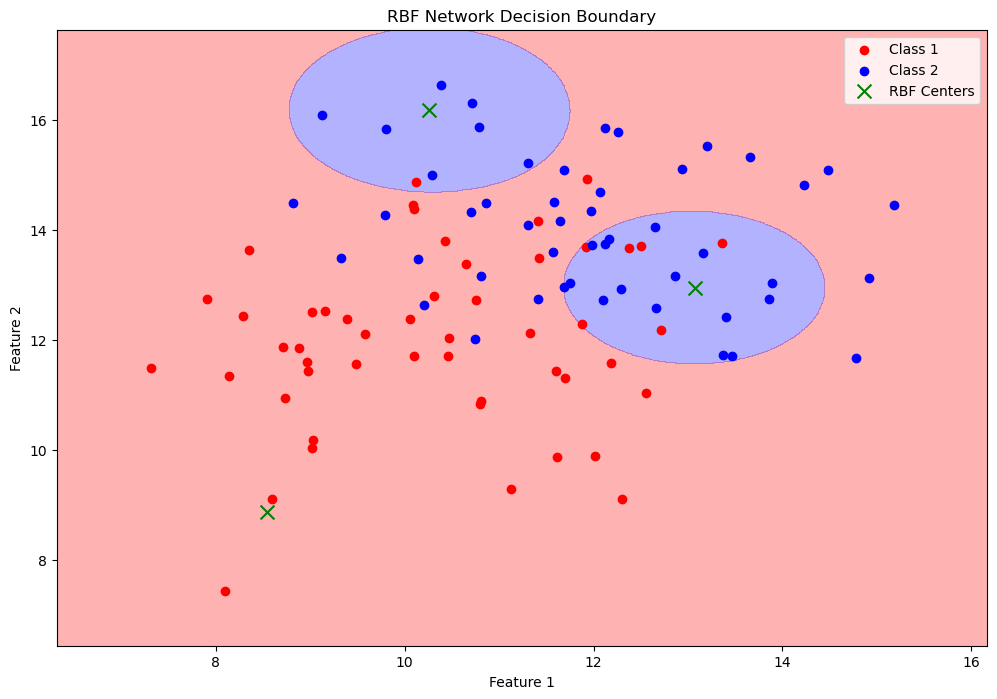

In [1]:
import numpy as np
import matplotlib.pyplot as plt

float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# Load the datasets
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')

# X1 = X1[:5, :]
# X2 = X2[:5, :]

# Combine the datasets
X = np.concatenate((X1, X2))
# Create labels: 0 for Class 1, 1 for Class 2
T = np.array([0]*len(X1) + [1]*len(X2))

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
T = T[indices]

# X = X[:10, :]
# T = T[:10]
# print('X: ', X)
print('X.shape: ', X.shape)
print('T.shape: ', T.shape)

# Define the number of neurons in each layer
input_neurons = 2
hidden_neurons = 3  
output_neurons = 1

# Width σ is set to 1 
sigma = 1.0


# Randomly choose RBF centers within the range of the data
np.random.seed(42)  # For reproducibility

# Determine the range of the data
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

# Randomly choose 3 RBF centers within the data range
centers = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(hidden_neurons, 2))

print('centers: ', centers)


# Plot the data and RBF centers
plt.figure(figsize=(12, 8))
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 2')
plt.scatter(centers[:, 0], centers[:, 1], color='green', marker='x', s=100, label='RBF Centers')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Visualization with RBF Centers')
plt.show()

# Function to compute the RBF activation
def compute_rbf_activations(X, centers, sigma):
    # Compute the squared Euclidean distance between each data point and each center
    # Resulting shape: [num_samples, num_centers]
    dists_sq = np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :]) ** 2, axis=2)
    # print('dists_sq: ', dists_sq)
    # Compute the RBF activations
    activations = np.exp(-dists_sq / (2 * sigma ** 2))
    return activations

# print('X: ', X)

# Compute activations for all data points
H = compute_rbf_activations(X, centers, sigma)  # Shape: [num_samples, hidden_neurons]

# print('H:' , H)

# Target outputs T need to be of shape [num_samples, 1]
T = T.reshape(-1, 1)

# print('T: ', T)

# Least Squares Estimation to compute weights from hidden layer to output layer
# W = (H^T H)^(-1) H^T T
# To avoid issues when H^T H is singular, we can use np.linalg.pinv

# Compute weights
W = np.linalg.pinv(H).dot(T)  # Shape: [hidden_neurons, output_neurons]

print('W: ', W)

# Compute outputs
# outputs = H_with_bias.dot(W)  # Shape: [num_samples, output_neurons]
outputs = H.dot(W)  # Shape: [num_samples, output_neurons]

# print('outputs: ', outputs)

# Classification: threshold at 0.5
predictions = (outputs >= 0.5).astype(int)

# Compute classification accuracy
accuracy = np.mean(predictions == T) * 100
print(f"Classification accuracy: {accuracy:.2f}%")

# Plot the decision boundary
# create a mesh to plot in
h = .01  # step size in the mesh
grid_x_min, grid_x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
grid_y_min, grid_y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(grid_x_min, grid_x_max, h),
                     np.arange(grid_y_min, grid_y_max, h))

# Compute the RBF activations for the grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]
H_grid = compute_rbf_activations(grid_points, centers, sigma)  # Shape: [num_grid_points, hidden_neurons]

# Compute outputs for grid points
grid_outputs = H_grid.dot(W)
grid_predictions = grid_outputs.reshape(xx.shape)

# Plot the data and decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, grid_predictions >= 0.5, alpha=0.3, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 2')
plt.scatter(centers[:, 0], centers[:, 1], color='green', marker='x', s=100, label='RBF Centers')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF Network Decision Boundary')
plt.show()


X.shape:  (100, 2)
T.shape:  (100,)
centers:  [[10.2616 16.1790]
 [13.0710 12.9435]
 [8.5442 8.8752]
 [7.7745 15.4021]
 [12.0424 13.9490]
 [7.4797 16.3554]]
W:  [[1.2098]
 [0.7874]
 [-0.0001]
 [2.3529]
 [0.5879]
 [-1.7468]]
Classification accuracy: 71.00%


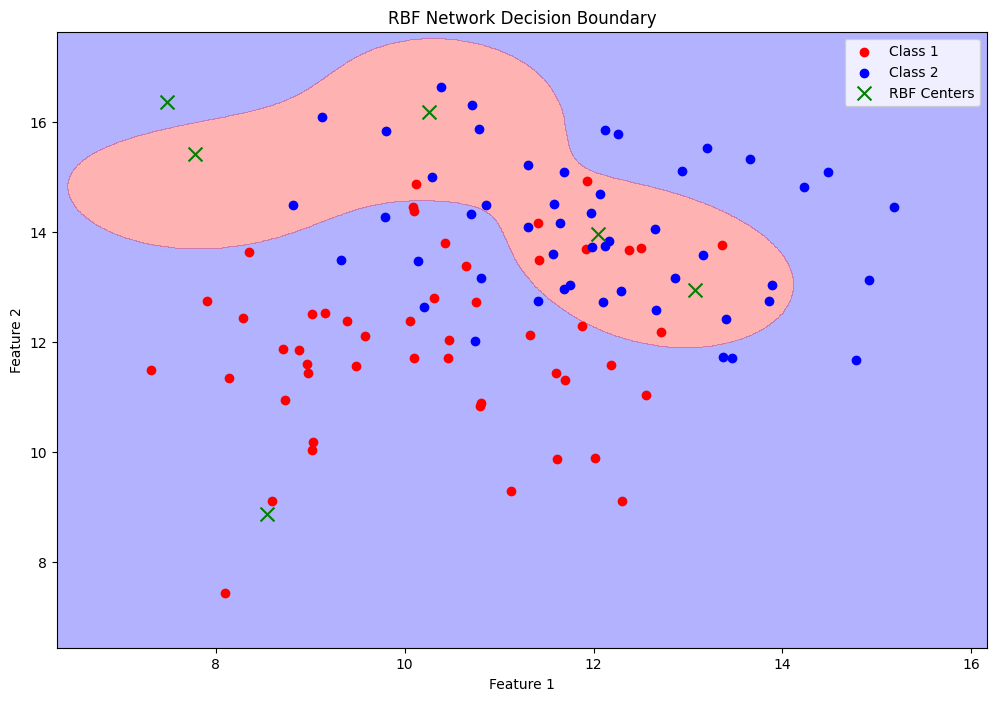

In [2]:
import numpy as np
import matplotlib.pyplot as plt

float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# Load the datasets
X1 = np.load('class1.npy')
X2 = np.load('class2.npy')

# X1 = X1[:5, :]
# X2 = X2[:5, :]

# Combine the datasets
X = np.concatenate((X1, X2))
# Create labels: 0 for Class 1, 1 for Class 2
T = np.array([0]*len(X1) + [1]*len(X2))

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
T = T[indices]

# X = X[:10, :]
# T = T[:10]
# print('X: ', X)
print('X.shape: ', X.shape)
print('T.shape: ', T.shape)

# Define the number of neurons in each layer
input_neurons = 2
hidden_neurons = 6  
output_neurons = 1

# Width σ is set to 1 
sigma = 1.0


# Randomly choose RBF centers within the range of the data
np.random.seed(42)  # For reproducibility

# Determine the range of the data
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

# Randomly choose 3 RBF centers within the data range
centers = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(hidden_neurons, 2))

print('centers: ', centers)

# Function to compute the RBF activation
def compute_rbf_activations(X, centers, sigma):
    # Compute the squared Euclidean distance between each data point and each center
    # Resulting shape: [num_samples, num_centers]
    dists_sq = np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :]) ** 2, axis=2)
    # print('dists_sq: ', dists_sq)
    # Compute the RBF activations
    activations = np.exp(-dists_sq / (2 * sigma ** 2))
    return activations

# print('X: ', X)

# Compute activations for all data points
H = compute_rbf_activations(X, centers, sigma)  # Shape: [num_samples, hidden_neurons]

# print('H:' , H)

# Target outputs T need to be of shape [num_samples, 1]
T = T.reshape(-1, 1)

# print('T: ', T)

# Least Squares Estimation to compute weights from hidden layer to output layer
# W = (H^T H)^(-1) H^T T
# To avoid issues when H^T H is singular, we can use np.linalg.pinv

# Compute weights
W = np.linalg.pinv(H).dot(T)  # Shape: [hidden_neurons, output_neurons]

print('W: ', W)

# Compute outputs
# outputs = H_with_bias.dot(W)  # Shape: [num_samples, output_neurons]
outputs = H.dot(W)  # Shape: [num_samples, output_neurons]

# print('outputs: ', outputs)

# Classification: threshold at 0.5
predictions = (outputs >= 0.5).astype(int)

# Compute classification accuracy
accuracy = np.mean(predictions == T) * 100
print(f"Classification accuracy: {accuracy:.2f}%")

# Plot the decision boundary
# create a mesh to plot in
h = .01  # step size in the mesh
grid_x_min, grid_x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
grid_y_min, grid_y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(grid_x_min, grid_x_max, h),
                     np.arange(grid_y_min, grid_y_max, h))

# Compute the RBF activations for the grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]
H_grid = compute_rbf_activations(grid_points, centers, sigma)  # Shape: [num_grid_points, hidden_neurons]

# Compute outputs for grid points
grid_outputs = H_grid.dot(W)
grid_predictions = grid_outputs.reshape(xx.shape)

# Plot the data and decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, grid_predictions >= 0.5, alpha=0.3, levels=[-1, 0, 1], colors=['blue', 'red'])
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 2')
plt.scatter(centers[:, 0], centers[:, 1], color='green', marker='x', s=100, label='RBF Centers')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF Network Decision Boundary')
plt.show()